In [31]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
stock = '^IXIC'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000


In [33]:
price = data['Close']
price

Date
2010-01-04     2308.419922
2010-01-05     2308.709961
2010-01-06     2301.090088
2010-01-07     2300.050049
2010-01-08     2317.169922
                  ...     
2023-05-12    12284.740234
2023-05-15    12365.209961
2023-05-16    12343.049805
2023-05-17    12500.570312
2023-05-18    12688.839844
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

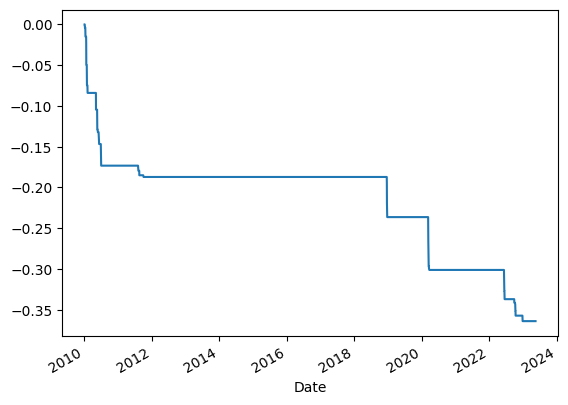

In [34]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [35]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -36.395279909120205 %


In [36]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00012564, -0.00330049, ..., -0.00179214,
        0.01276188,  0.01506088])

In [37]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00012564, 0.99682474, ..., 5.34696902, 5.41520639,
       5.49676414])

In [38]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 549.6764138754966%


In [39]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.017988
2012-12-31    0.159054
2013-12-31    0.383201
2014-12-31    0.133951
2015-12-31    0.057297
2016-12-31    0.075031
2017-12-31    0.282414
2018-12-31   -0.038837
2019-12-31    0.352256
2020-12-31    0.436404
2021-12-31    0.213891
2022-12-31   -0.331000
2023-12-31    0.212331
Freq: A-DEC, Name: Close, dtype: float64

In [40]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.042336
2010-03-31    0.071350
2010-04-30    0.026368
2010-05-31   -0.082948
                ...   
2023-01-31    0.106824
2023-02-28   -0.011136
2023-03-31    0.066900
2023-04-30    0.000382
2023-05-31    0.037808
Freq: M, Name: Close, Length: 161, dtype: float64

In [41]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 14.753889879554885%


In [42]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 15.466398845898354


In [43]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.082948
2010-06-30   -0.065484
2010-08-31   -0.062390
2010-11-30   -0.003661
2011-03-31   -0.000431
2011-05-31   -0.013308
2011-06-30   -0.021790
2011-07-31   -0.006180
2011-08-31   -0.064186
2011-09-30   -0.063602
2011-11-30   -0.023867
2011-12-31   -0.005797
2012-04-30   -0.014624
2012-05-31   -0.071896
2012-10-31   -0.044605
2013-06-30   -0.015238
2013-08-31   -0.010065
2014-01-31   -0.017409
2014-03-31   -0.025331
2014-04-30   -0.020107
2014-07-31   -0.008713
2014-09-30   -0.018968
2014-12-31   -0.011599
2015-01-31   -0.021286
2015-03-31   -0.012622
2015-06-30   -0.016402
2015-08-31   -0.068594
2015-09-30   -0.032733
2015-12-31   -0.019821
2016-01-31   -0.078576
2016-02-29   -0.012137
2016-04-30   -0.019403
2016-06-30   -0.021297
2016-10-31   -0.023129
2017-06-30   -0.009373
2018-02-28   -0.018683
2018-03-31   -0.028813
2018-09-30   -0.007792
2018-10-31   -0.092023
2018-12-31   -0.094844
2019-05-31   -0.079334
2019-08-31   -0.025997
2020-02-29   -0.063772
2020-0

In [44]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 23.68780341620104
